# Klasifikasi K-Nearest Neighbour (KNN)
### Dengan K = 4
Sumber : https://github.com/kk7nc/Text_Classification#id34 (Dengan Perubahan)

## Import module / package

In [1]:
import pandas as pd
from sklearn import model_selection
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/tweets_labelled_tokenized_nltk_indexed.csv")
df

,index,tweet,sentimen
0,0,"['menangani', 'kekerasan', 'seksual', 'disahka...",Positif
1,1,"['menangani', 'kekerasan', 'seksual', 'disahka...",Positif
2,2,"['wakil', 'mpr', 'ri', 'mahasiswa', 'kawal', '...",Negatif
3,3,"['fadel', 'muhammad', 'mahasiswa', 'kawal', 'i...",Negatif
4,4,"['tanggal', 'chatnya', 'april', 'dijerat']",Negatif
...,...,...,...
15627,15627,"['koordinator', 'forum', 'perempuan', 'indones...",Positif
15628,15628,"['dinilai', 'penuhi', 'harapan', 'kaum', 'pere...",Netral
15629,15629,"['keberadaan', 'payung', 'hukum', 'merehabilit...",Netral
15630,15630,"['menyebut', 'kehadiran', 'wujud', 'keberpihak...",Positif


In [3]:
df_test = pd.read_csv("data/Data-Test-Manual-Labelling.csv")
df_test

,index,tweet,tweet_asli,auto_sentimen_vader,sentimen_manual,vader_labelling_correct,vader_labelling_correct_bin
0,3,"['fadel', 'muhammad', 'mahasiswa', 'kawal', 'i...",Fadel Muhammad Minta Mahasiswa Kawal Implement...,Negatif,Positif,False,0
1,25,"['sikap', 'dinilai', 'konsisten', 'serius', 'm...",Sikap Puan yang dinilai konsisten dan serius d...,Positif,Positif,True,1
2,34,"['haru', 'lega', 'rasakan', 'beleid', 'disahka...",�Haru dan lega. Itu yang saya rasakan setelah ...,Positif,Positif,True,1
3,35,"['perwakilan', 'pejuang', 'berterima', 'kasih'...",Perwakilan pejuang UU TPKS berterima kasih kar...,Positif,Positif,True,1
4,64,"['menko', 'pmk', 'salah', 'tokoh', 'memperjuan...","Sejak menjadi Menko PMK, Puan menjadi salah sa...",Positif,Positif,True,1
...,...,...,...,...,...,...,...
1559,15603,"['akhiranya', 'sahhhh']",Alhamdulillah ?? akhiranya UU TPKS sahhhh,Positif,Positif,True,1
1560,15604,"['kabar', 'gembira', 'pan', 'sah']",Kabar gembira min @Official_PAN RUU TPKS sah m...,Positif,Positif,True,1
1561,15608,"['ketok', 'palu', 'sah']",UU TPKS KETOK PALU! SAH!,Positif,Positif,True,1
1562,15619,"['disetujui', 'disahkan', 'jakarta', 'ri', 'me...",#BeritaSampit\nKetua DPR: Hari Ini RUU TPKS Ak...,Positif,Positif,True,1


In [4]:
def merge_neutral(text):
    if text == "Netral":
        return "Positif"
    if text == "Positif":
        return "Positif"
    else:
        return "Negatif"

df['sentimen'] = df['sentimen'].apply(merge_neutral)
df

,index,tweet,sentimen
0,0,"['menangani', 'kekerasan', 'seksual', 'disahka...",Positif
1,1,"['menangani', 'kekerasan', 'seksual', 'disahka...",Positif
2,2,"['wakil', 'mpr', 'ri', 'mahasiswa', 'kawal', '...",Negatif
3,3,"['fadel', 'muhammad', 'mahasiswa', 'kawal', 'i...",Negatif
4,4,"['tanggal', 'chatnya', 'april', 'dijerat']",Negatif
...,...,...,...
15627,15627,"['koordinator', 'forum', 'perempuan', 'indones...",Positif
15628,15628,"['dinilai', 'penuhi', 'harapan', 'kaum', 'pere...",Positif
15629,15629,"['keberadaan', 'payung', 'hukum', 'merehabilit...",Positif
15630,15630,"['menyebut', 'kehadiran', 'wujud', 'keberpihak...",Positif


In [5]:
data_train_temp = pd.DataFrame()
data_train_temp = df[~df["index"].isin(df_test["index"])]
data_train_temp


train_X_df = data_train_temp["tweet"]
test_X_df = df_test["tweet"]
train_Y_df = data_train_temp["sentimen"]
test_Y_df = df_test["sentimen_manual"]

In [6]:
data_train = pd.DataFrame()
data_train['tweet'] = train_X_df
data_train['sentimen'] = train_Y_df

data_test = pd.DataFrame()
data_test['tweet'] = test_X_df
data_test['sentimen'] = test_Y_df

## Klasifikasi Data dengan KNN (K = 4) dan Menampilkan Akurasi

In [7]:
text_clf = Pipeline([('vect', TfidfVectorizer()),
                     ('clf', KNeighborsClassifier(n_neighbors=4)),
                     ])

text_clf.fit(train_X_df, train_Y_df)
predicted = text_clf.predict(test_X_df)

print("K-Nearest Neighbors Accuracy:", accuracy_score(test_Y_df, predicted)*100, "%")
print("K-Nearest Neighbors Precision:", precision_score(test_Y_df, predicted, average="binary",
                                                        pos_label="Positif")*100, "%")
print("K-Nearest Neighbors Recall:", recall_score(test_Y_df, predicted, average="binary",
                                                  pos_label="Positif")*100, "%")
print("K-Nearest Neighbors f1_score:", f1_score(test_Y_df, predicted, average="binary",
                                                pos_label="Positif")*100, "%")

print(f'Confusion Matrix:\n {confusion_matrix(test_Y_df, predicted)}')
print('====================================================\n')
print(classification_report(test_Y_df, predicted, zero_division=0))

K-Nearest Neighbors Accuracy: 84.52685421994885 %
K-Nearest Neighbors Precision: 88.16821097647897 %
K-Nearest Neighbors Recall: 94.21172886519422 %
K-Nearest Neighbors f1_score: 91.0898379970545 %
Confusion Matrix:
 [[  85  166]
 [  76 1237]]

              precision    recall  f1-score   support

     Negatif       0.53      0.34      0.41       251
     Positif       0.88      0.94      0.91      1313

    accuracy                           0.85      1564
   macro avg       0.70      0.64      0.66      1564
weighted avg       0.82      0.85      0.83      1564



K-Nearest Neighbors Accuracy: 84.52685421994885 %


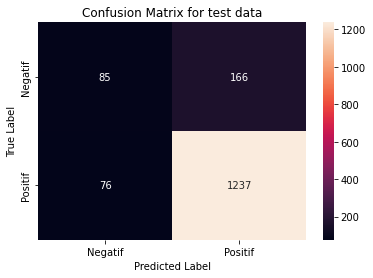

In [8]:
print("K-Nearest Neighbors Accuracy:", accuracy_score(test_Y_df, predicted)*100, "%")

conf_mat = confusion_matrix(test_Y_df, predicted)
class_label = ["Negatif","Positif"]
test =pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(test, annot = True, fmt = "d")
plt.title("Confusion Matrix for test data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()